In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv(r'C:\Users\prati\Downloads\titanic\train.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


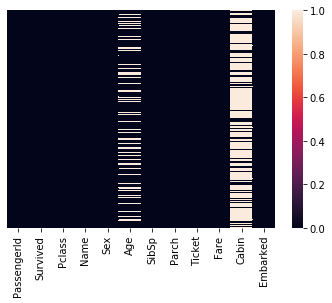

In [8]:
sns.heatmap(train.isnull(),yticklabels=False)

In [10]:
sns.set_style('whitegrid')

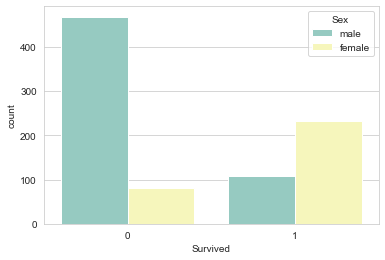

In [13]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='Set3')

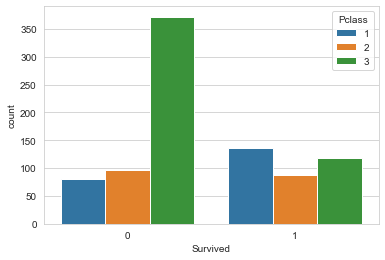

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=train)

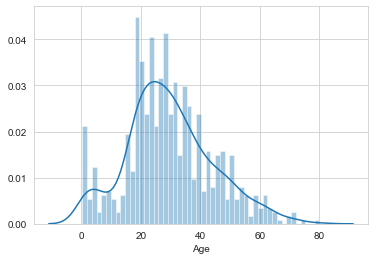

In [18]:
sns.distplot(train['Age'].dropna(),bins=50)

# DATA CLEANING

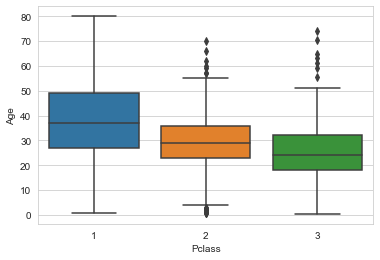

In [20]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [32]:
def mag_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [39]:
train['age']=train[['Age','Pclass']].apply(mag_age,axis=1)

In [40]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,24.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


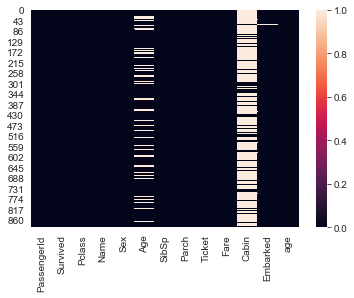

In [41]:
sns.heatmap(train.isnull())

In [48]:
train.drop(['Age'],axis=1,inplace=True)

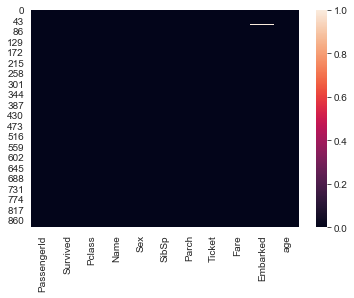

In [49]:
sns.heatmap(train.isnull())

In [51]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [52]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [54]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [55]:
sex


,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [56]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [57]:
train

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,age
0,1,0,3,1,0,7.2500,22.0
1,2,1,1,1,0,71.2833,38.0
2,3,1,3,0,0,7.9250,26.0
3,4,1,1,1,0,53.1000,35.0
4,5,0,3,0,0,8.0500,35.0
...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,27.0
887,888,1,1,0,0,30.0000,19.0
888,889,0,3,1,2,23.4500,24.0
889,890,1,1,0,0,30.0000,26.0


In [59]:
train=pd.concat([train,sex,embark],axis=1)

In [60]:
train


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,age,male,Q,S
0,1,0,3,1,0,7.2500,22.0,1,0,1
1,2,1,1,1,0,71.2833,38.0,0,0,0
2,3,1,3,0,0,7.9250,26.0,0,0,1
3,4,1,1,1,0,53.1000,35.0,0,0,1
4,5,0,3,0,0,8.0500,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,27.0,1,0,1
887,888,1,1,0,0,30.0000,19.0,0,0,1
888,889,0,3,1,2,23.4500,24.0,0,0,1
889,890,1,1,0,0,30.0000,26.0,1,0,0


In [61]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)

In [98]:
X_train.count()

PassengerId    623
Pclass         623
SibSp          623
Parch          623
Fare           623
age            623
male           623
Q              623
S              623
dtype: int64

In [99]:
X_test.count()

PassengerId    268
Pclass         268
SibSp          268
Parch          268
Fare           268
age            268
male           268
Q              268
S              268
dtype: int64

# PRIDICTION

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logmodel=LogisticRegression()

In [102]:
logmodel.fit(X_train,y_train)

C:\Users\prati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
pridiction=logmodel.predict(X_test)

In [115]:
pridiction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [116]:
from sklearn.metrics import confusion_matrix 

In [123]:
accuracy=confusion_matrix(y_test,pridiction)

In [124]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
accuracy=accuracy_score(y_test,pridiction)

In [127]:
accuracy

0.7686567164179104

# EVALUATION

In [128]:
from sklearn.metrics import classification_report

In [129]:
print(classification_report(y_test,pridiction))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

